## Dataset Creation

General Dataset overview

In [1]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reddit = praw.Reddit(
    # client_id="ClientID",
    # client_secret="API Key",
    # user_agent="Username",
    
)

subreddit = reddit.subreddit("udub")

count = 0
new = []
hot = []
top = []
rising = []
controversial = []

In [2]:
new = []
for submission in subreddit.new(limit=None):
    new.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_new = pd.DataFrame(new, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [3]:
hot = []
for submission in subreddit.hot(limit=None):
    hot.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_hot = pd.DataFrame(hot, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [4]:
top = []
for submission in subreddit.top(limit=None):
    top.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_top = pd.DataFrame(top, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [5]:
rising = []
for submission in subreddit.rising(limit=None):
    rising.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_rising = pd.DataFrame(rising, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [6]:
controversial = []
for submission in subreddit.controversial(limit=None):
    controversial.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_controversial = pd.DataFrame(controversial, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [7]:
df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial])
df_all = df_all.drop_duplicates(subset='ID')

df_all.shape

(2909, 5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_csv("df_new.csv")
df_controversial = pd.read_csv("df_controversial.csv")
df_hot = pd.read_csv("df_hot.csv")
df_rising = pd.read_csv("df_rising.csv")
df_top = pd.read_csv("df_top.csv")

# Combine all dataframes
df_new['Category'] = 'new'
df_hot['Category'] = 'hot'
df_top['Category'] = 'top'
df_rising['Category'] = 'rising'
df_controversial['Category'] = 'controversial'

df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial])
df_all = df_all.drop_duplicates(subset='ID')

df_all.to_csv('df_all.csv')

df_all


,ID,Title,Text,Flair,URL,Comments,Votes,Category
0,1c7kf12,Any cool stores near the UW?,I want to kill a couple of hours or so at shop...,NaN,https://www.reddit.com/r/udub/comments/1c7kf12...,2,2,new
1,1c7h6vu,Suzzallo Starbucks Deals,Do the campus starbucks (more specially Suzzal...,NaN,https://www.reddit.com/r/udub/comments/1c7h6vu...,3,0,new
2,1c7ezoi,UW or CWRU (case western) for pre med?,Pre-med with intended major: Global Affairs/In...,Advice,https://www.reddit.com/r/udub/comments/1c7ezoi...,1,0,new
3,1c7ez05,Full size bed frame for free,Getting rid of a bed frame. It will be taken a...,NaN,https://www.reddit.com/r/udub/comments/1c7ez05...,2,1,new
4,1c7cqxb,How UW investigates sexual assault allegations...,NaN,NaN,https://www.seattletimes.com/seattle-news/law-...,0,3,new
...,...,...,...,...,...,...,...,...
991,18y1jd6,Does anyone have CS 122 Assignment Prompts?,I'm looking to work ahead in CS122 and start o...,NaN,https://www.reddit.com/r/udub/comments/18y1jd6...,5,0,controversial
992,18jccxx,Do I need an associate degree to transfer?,I know exactly which classes I want to do in c...,Advice,https://www.reddit.com/r/udub/comments/18jccxx...,7,0,controversial
993,184zjj8,Major Options,Hi! i’m thinking about pursuing the informatic...,NaN,https://www.reddit.com/r/udub/comments/184zjj8...,6,0,controversial
994,179dpxa,Selling up to 3 Dawg Pack tickets for Arizona ...,"dm if interested\n\ngiven all the scams, i'll ...",NaN,https://www.reddit.com/r/udub/comments/179dpxa...,1,0,controversial


## Primary Hypothesis: Does the average length of the body/Title significantly differ across different data sources

In this hypothesis we are wondering if the data source of the post influences the likelihood of a post being longer or shorter. For example some categories reddit has are new, hot, top, rising, and controversial and thus there is a potential that certain types of post length may cluster into certain data sources primarily due to psychological or behavioral actions. For example posts that are controversial may be longer due to the need for dense and very detailed accounts of the controversy while posts that are hot/top might be shorter as it allows for the user to more easily digest the content.

The method we have chosen to help solve and gain more insight into this hypothesis is through comparing cluster profiels pariculary the data source clusters which include (new, hot, top, rising, and controversial). In this process we have opted to remove posts that have zero Text length as we felt they may skew the results and because they have no text we would be unable to train models on that text. Alongside this we do have to take into consideration there may be duplicate posts between these different data sources due to how the PRAW/Reddit API works.

In Step 1 we first found the length of every post within each dataframe and then 

In [2]:
Text_Sizes = []

Lengths_new = df_new['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_new', Lengths_new.min(), Lengths_new.max(), Lengths_new.mean().round(),Lengths_new.median()])


Lengths_hot = df_hot['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_hot', Lengths_hot.min(), Lengths_hot.max(), Lengths_hot.mean().round(),Lengths_hot.median()])

Lengths_top = df_top['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_top', Lengths_top.min(), Lengths_top.max(), Lengths_top.mean().round(),Lengths_top.median()])

Lengths_rising = df_rising['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_rising', Lengths_rising.min(), Lengths_rising.max(), Lengths_rising.mean().round(),Lengths_rising.median()])

Lengths_controversial = df_controversial['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_controversial', Lengths_controversial.min(), Lengths_controversial.max(), Lengths_controversial.mean().round(),Lengths_controversial.median()])

df_Text_Sizes = pd.DataFrame(Text_Sizes, columns=['Data_Source', 'Min', 'Max', 'Mean','Median'])

df_Text_Sizes.head(5)

,Data_Source,Min,Max,Mean,Median
0,df_new,3,5921,392.0,266.0
1,df_hot,3,5921,413.0,280.0
2,df_top,1,13200,204.0,3.0
3,df_rising,3,1866,336.0,123.0
4,df_controversial,3,4886,381.0,210.0


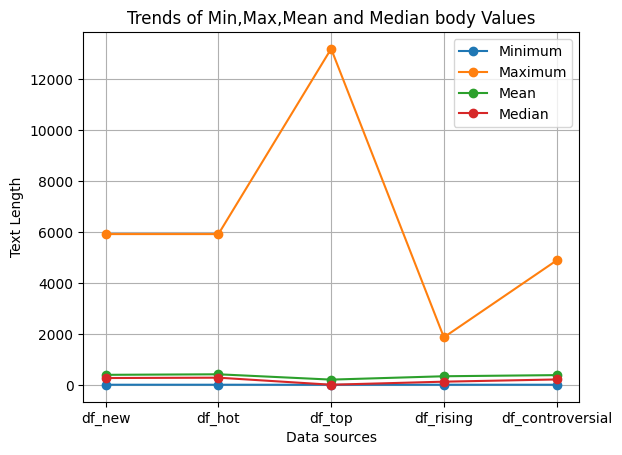

In [3]:
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Min'], marker='o', label='Minimum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Max'], marker='o', label='Maximum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Mean'], marker='o', label='Mean')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Median'], marker='o', label='Median')



# Adding labels and title
plt.xlabel('Data sources')
plt.ylabel('Text Length')
plt.title('Trends of Min,Max,Mean and Median body Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [4]:
Text_Sizes = []

Lengths_new = df_new['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_new', Lengths_new.min(), Lengths_new.max(), Lengths_new.mean().round(),Lengths_new.median()])


Lengths_hot = df_hot['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_hot', Lengths_hot.min(), Lengths_hot.max(), Lengths_hot.mean().round(),Lengths_hot.median()])

Lengths_top = df_top['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_top', Lengths_top.min(), Lengths_top.max(), Lengths_top.mean().round(),Lengths_top.median()])

Lengths_rising = df_rising['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_rising', Lengths_rising.min(), Lengths_rising.max(), Lengths_rising.mean().round(),Lengths_rising.median()])

Lengths_controversial = df_controversial['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_controversial', Lengths_controversial.min(), Lengths_controversial.max(), Lengths_controversial.mean().round(),Lengths_controversial.median()])

df_Text_Sizes = pd.DataFrame(Text_Sizes, columns=['Data_Source', 'Min', 'Max', 'Mean','Median'])

df_Text_Sizes.head(5)

,Data_Source,Min,Max,Mean,Median
0,df_new,4,298,39.0,33.0
1,df_hot,7,298,38.0,33.0
2,df_top,2,289,46.0,37.0
3,df_rising,11,109,37.0,28.0
4,df_controversial,2,253,46.0,38.0


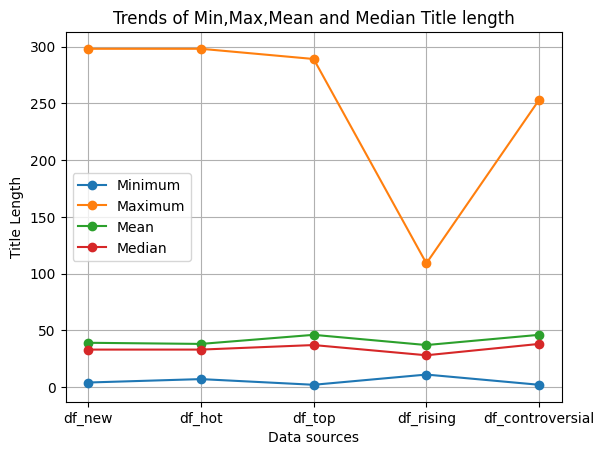

In [5]:
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Min'], marker='o', label='Minimum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Max'], marker='o', label='Maximum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Mean'], marker='o', label='Mean')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Median'], marker='o', label='Median')



# Adding labels and title
plt.xlabel('Data sources')
plt.ylabel('Title Length')
plt.title('Trends of Min,Max,Mean and Median Title length')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Overall the main results I found through this analysis is although text and title max length vary quite heavily the mean/median length of these posts text and title don't vary. Because of this finding I believe there isn't any large text length variations between data sources that would influence our ability to train our model.  